In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import pydot
import graphviz
from ipywidgets import interactive
from IPython.display import SVG,display
from sklearn.tree import export_graphviz

In [20]:
colab = True

if colab:
  df = pd.read_csv("/content/saeb_pb_2017-2007_treated.csv")

df

<ipython-input-20-532fdad3a3e8>:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/saeb_pb_2017-2007_treated.csv")


,correcao_licao_casa,faz_licao_casa,pai_le,pretensao_futura,reprovacao,tempo_trabalho_domestico,possui_tv,pai_sabe_ler_escrever,frequenta_espetaculo_exposicao,desempenho_aluno,...,utiliza_biblioteca_escola,responsaveis_comparecem_reuniao_pais,escola_publica,inicio_estudos,gosta_estudar_disciplina,leitura_historia_quadrinhos,frequenta_cinema,responsaveis_incentivam_comparecer_aulas,disciplina,desempenho_aluno_cat
0,2.0,2.0,0.0,2.0,0.0,3.0,1.0,1.0,1.0,Básico,...,0.0,1.0,1,1.0,1.0,0.0,1.0,1.0,LP,1
1,2.0,2.0,0.0,0.0,0.0,4.0,2.0,0.0,1.0,Proficiente,...,0.0,0.0,1,2.0,1.0,0.0,0.0,0.0,LP,2
2,2.0,2.0,1.0,2.0,1.0,1.0,NaN,1.0,1.0,Insuficiente,...,1.0,2.0,1,1.0,1.0,1.0,1.0,1.0,MT,0
3,2.0,2.0,1.0,0.0,1.0,1.0,NaN,1.0,NaN,Insuficiente,...,2.0,2.0,1,1.0,1.0,2.0,2.0,1.0,LP,0
4,2.0,2.0,0.0,2.0,0.0,3.0,1.0,1.0,1.0,Básico,...,0.0,1.0,1,1.0,0.0,0.0,1.0,1.0,MT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238726,2.0,2.0,0.0,3.0,1.0,1.0,0.0,1.0,NaN,Insuficiente,...,NaN,2.0,1,2.0,1.0,NaN,NaN,1.0,MT,0
238727,1.0,1.0,0.0,3.0,2.0,4.0,0.0,0.0,NaN,Insuficiente,...,NaN,1.0,1,1.0,0.0,NaN,NaN,1.0,MT,0
238728,1.0,1.0,0.0,3.0,2.0,4.0,0.0,0.0,NaN,Básico,...,NaN,1.0,1,1.0,1.0,NaN,NaN,1.0,LP,1
238729,2.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,NaN,Insuficiente,...,NaN,1.0,1,2.0,1.0,NaN,NaN,1.0,MT,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238731 entries, 0 to 238730
Data columns (total 51 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   correcao_licao_casa                            232394 non-null  float64
 1   faz_licao_casa                                 232177 non-null  float64
 2   pai_le                                         226141 non-null  float64
 3   pretensao_futura                               232745 non-null  float64
 4   reprovacao                                     232235 non-null  float64
 5   tempo_trabalho_domestico                       228883 non-null  float64
 6   possui_tv                                      222081 non-null  float64
 7   pai_sabe_ler_escrever                          227874 non-null  float64
 8   frequenta_espetaculo_exposicao                 128588 non-null  float64
 9   desempenho_aluno                     

In [22]:
# dropar linhas com valores nulos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68252 entries, 1798 to 136517
Data columns (total 51 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   correcao_licao_casa                            68252 non-null  float64
 1   faz_licao_casa                                 68252 non-null  float64
 2   pai_le                                         68252 non-null  float64
 3   pretensao_futura                               68252 non-null  float64
 4   reprovacao                                     68252 non-null  float64
 5   tempo_trabalho_domestico                       68252 non-null  float64
 6   possui_tv                                      68252 non-null  float64
 7   pai_sabe_ler_escrever                          68252 non-null  float64
 8   frequenta_espetaculo_exposicao                 68252 non-null  float64
 9   desempenho_aluno                               6825

In [23]:
exclude = ['ano', 'id_aluno', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'turno', 'escola_publica', 'desempenho_aluno', 'desempenho_aluno_cat']

In [24]:
df = df[df['disciplina'] == 'MT']

In [25]:
# transforming target

median = df['proficiencia'].median()

df['target'] = np.where(df['proficiencia'] >= median, 1, 0)
df['target'].value_counts()

,count
target,
1,17073
0,17072


In [26]:
df.drop(columns=exclude + ['target']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 34145 entries, 1798 to 136517
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   correcao_licao_casa                            34145 non-null  float64
 1   faz_licao_casa                                 34145 non-null  float64
 2   pai_le                                         34145 non-null  float64
 3   pretensao_futura                               34145 non-null  float64
 4   reprovacao                                     34145 non-null  float64
 5   tempo_trabalho_domestico                       34145 non-null  float64
 6   possui_tv                                      34145 non-null  float64
 7   pai_sabe_ler_escrever                          34145 non-null  float64
 8   frequenta_espetaculo_exposicao                 34145 non-null  float64
 9   leitura_revista_comportamento                  3414

In [27]:
# Separar as colunas categóricas
X = df.drop(columns=exclude + ['target'] + ['idade'])
categorical_cols = X.columns.tolist()

# Instanciar e aplicar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X)

# Criar um DataFrame com os dados codificados
df_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar com o DataFrame original (se necessário)
dados_final = pd.concat([df.drop(categorical_cols, axis=1), df_encoded], axis=1)

# Exibir o DataFrame final
print(dados_final)

      desempenho_aluno  raca_cor turno  proficiencia    id_aluno  idade  \
1798            Básico       2.0     2      0.261208  23065545.0   13.0   
1805            Básico       1.0     2      0.749027  23056981.0   13.0   
1807            Básico       0.0     1      0.188632  23057343.0   13.0   
1808            Básico       2.0     1      0.853604  23155179.0   13.0   
1809            Básico       0.0     1      0.462915  23074950.0   13.0   
...                ...       ...   ...           ...         ...    ...   
34138              NaN       NaN   NaN           NaN         NaN    NaN   
34140              NaN       NaN   NaN           NaN         NaN    NaN   
34141              NaN       NaN   NaN           NaN         NaN    NaN   
34143              NaN       NaN   NaN           NaN         NaN    NaN   
34144              NaN       NaN   NaN           NaN         NaN    NaN   

       proficiencia_saeb  erro_padrao  sexo  ano_nascimento  ...  \
1798          264.563904     0.

In [28]:
# dropando todas as linhas que possuem pelo menos um valor NaN
df = dados_final.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9934 entries, 1798 to 34142
Data columns (total 94 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   desempenho_aluno                                   9934 non-null   object 
 1   raca_cor                                           9934 non-null   float64
 2   turno                                              9934 non-null   object 
 3   proficiencia                                       9934 non-null   float64
 4   id_aluno                                           9934 non-null   float64
 5   idade                                              9934 non-null   float64
 6   proficiencia_saeb                                  9934 non-null   float64
 7   erro_padrao                                        9934 non-null   float64
 8   sexo                                               9934 non-null   float64
 9   ano_nasci

In [29]:
X = df.drop(columns=exclude + ['target'])
y = df['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2698)

print("Tamanho treino: " + str(len(X_train)))
print("Tamanho teste: " + str(len(X_test)))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Tamanho treino: 7947
Tamanho teste: 1987


In [31]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

Ein: 0.0000
Eout: 0.5038
              precision    recall  f1-score   support

         0.0       0.44      0.44      0.44       899
         1.0       0.54      0.54      0.54      1088

    accuracy                           0.50      1987
   macro avg       0.49      0.49      0.49      1987
weighted avg       0.50      0.50      0.50      1987



idade:0.015839481544660614
correcao_licao_casa_1.0:0.005444577987983596
correcao_licao_casa_2.0:0.008412054028269316
faz_licao_casa_1.0:0.004717830568872591
faz_licao_casa_2.0:0.005896032385823912
pai_le_1.0:0.012319851555877587
pretensao_futura_1.0:0.0032824444992887985
pretensao_futura_2.0:0.017109172583820893
pretensao_futura_3.0:0.009160799447895513
reprovacao_1.0:0.018042977253539275
reprovacao_2.0:0.012626829880849018
tempo_trabalho_domestico_1.0:0.01800096428139188
tempo_trabalho_domestico_2.0:0.016080810141961076
tempo_trabalho_domestico_3.0:0.012931338553998896
tempo_trabalho_domestico_4.0:0.014422979557067044
possui_tv_1.0:0.014381330753200102
possui_tv_2.0:0.014158302558417468
possui_tv_3.0:0.009240912503195699
possui_tv_4.0:0.003358032961466512
pai_sabe_ler_escrever_1.0:0.012277373689466877
frequenta_espetaculo_exposicao_1.0:0.018994311065530074
frequenta_espetaculo_exposicao_2.0:0.009326758882106906
leitura_revista_comportamento_1.0:0.009569000182877494
leitura_revista_com

<BarContainer object of 79 artists>

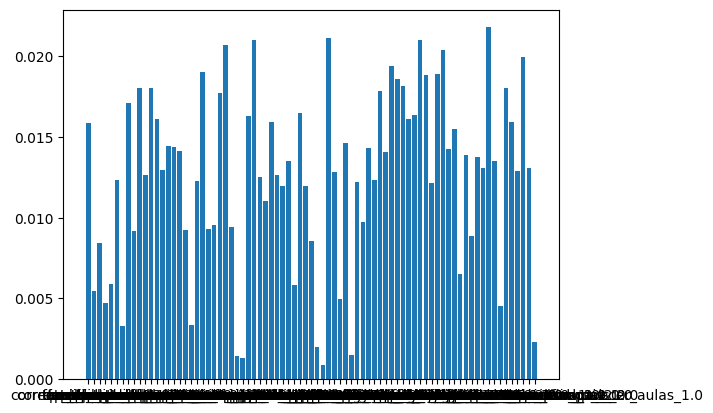

In [32]:
for feature, importance in zip(X.columns, clf.feature_importances_):
    print("{}:{}".format(feature, importance))

plt.bar(X.columns, clf.feature_importances_)

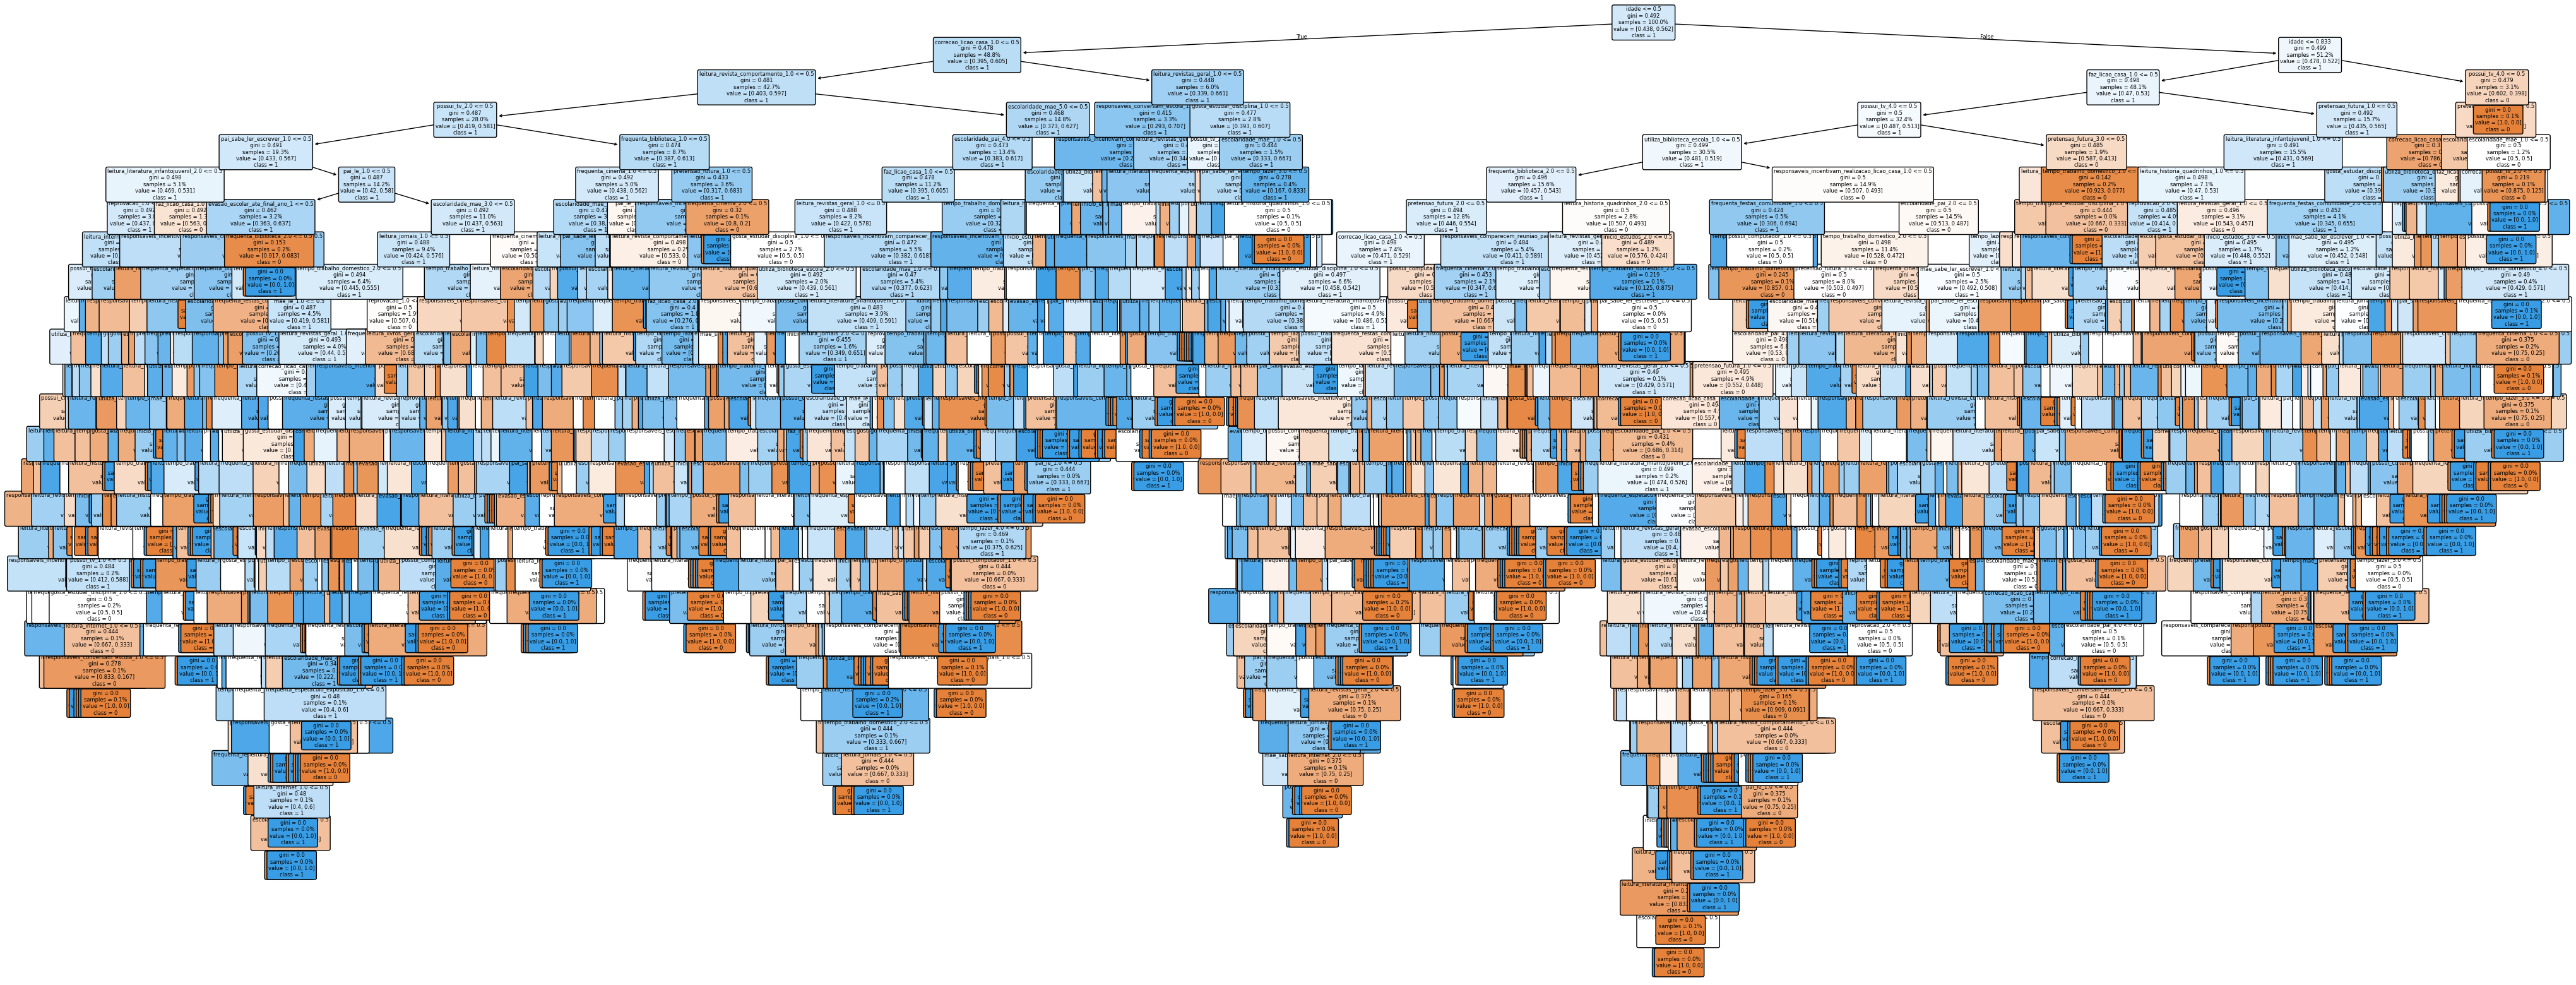

In [33]:
# feature labels
features_label = X.columns

# class label
class_label = ['0','1']

plt.figure(figsize=(50,20))
plot_tree(
    clf,
    feature_names = features_label,
    class_names = class_label,
    filled=True,
    proportion = True,
    fontsize=6,
    rounded = True)

plt.savefig('filename.png')

[0.00000000e+00 9.87023722e-05 1.00104395e-04 1.17980179e-04
 1.17980179e-04 1.17980179e-04 1.25845525e-04 1.31089088e-04
 1.31089088e-04 1.31089088e-04 1.31089088e-04 1.31089088e-04
 1.31089088e-04 1.31089088e-04 1.31089088e-04 1.31565776e-04
 1.34834491e-04 1.34834491e-04 1.34834491e-04 1.34834491e-04
 1.34834491e-04 1.34834491e-04 1.34834491e-04 1.34834491e-04
 1.34834491e-04 1.34834491e-04 1.34834491e-04 1.34834491e-04
 1.34834491e-04 1.36332652e-04 1.36332652e-04 1.37643543e-04
 1.37643543e-04 1.37643543e-04 1.37643543e-04 1.37643543e-04
 1.37643543e-04 1.37643543e-04 1.37643543e-04 1.37643543e-04
 1.37643543e-04 1.37643543e-04 1.37643543e-04 1.37643543e-04
 1.37643543e-04 1.38800211e-04 1.39828361e-04 1.39828361e-04
 1.39828361e-04 1.39828361e-04 1.39828361e-04 1.39828361e-04
 1.39828361e-04 1.39828361e-04 1.39828361e-04 1.39828361e-04
 1.39828361e-04 1.39828361e-04 1.39828361e-04 1.39828361e-04
 1.39828361e-04 1.39828361e-04 1.39828361e-04 1.39828361e-04
 1.39828361e-04 1.398283

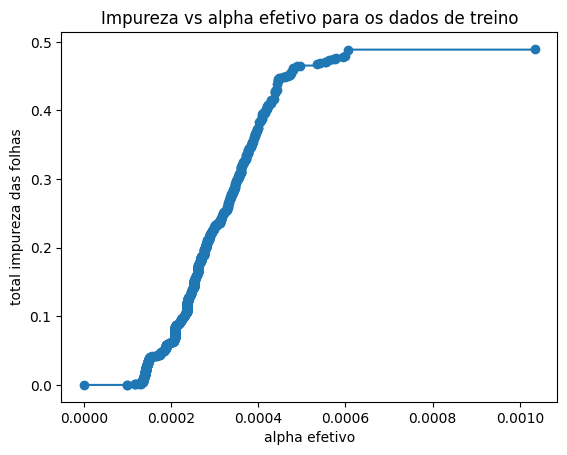

In [34]:
#Divide os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plota a relação entre os valores de alpha e impureza das folhas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Impureza vs alpha efetivo para os dados de treino")
fig.show()

print(ccp_alphas)
print(impurities)

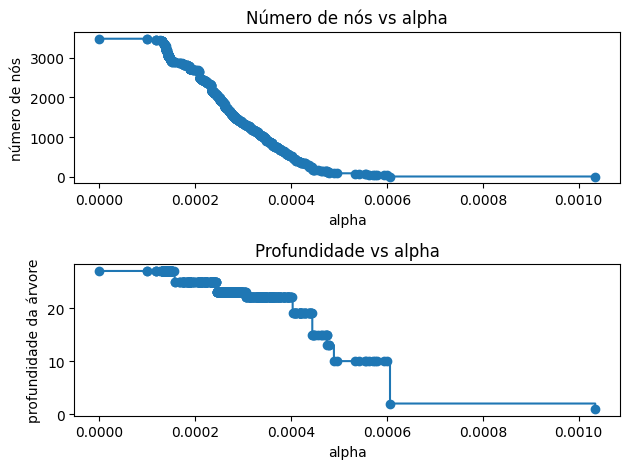

In [35]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs alpha")
fig.tight_layout()

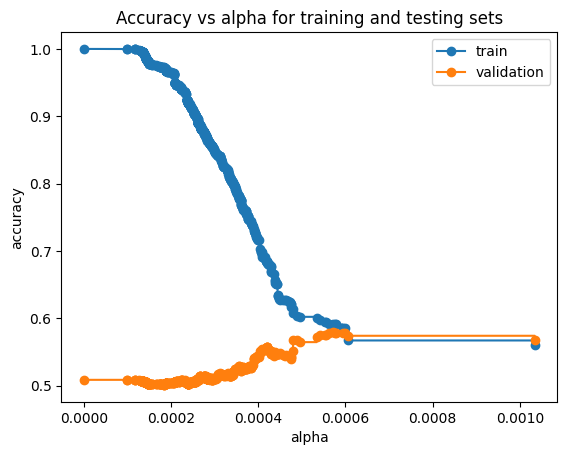

In [36]:
import matplotlib.pyplot as plt

train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [38]:
# identificando o alpha que resultou na melhor acurácia
best_alpha = ccp_alphas[np.argmax(val_scores)]
print("Melhor alpha: ", best_alpha)

Melhor alpha:  0.0005715033083270537


Ein: 0.4085
Eout: 0.4570
              precision    recall  f1-score   support

         0.0       0.48      0.14      0.22       899
         1.0       0.55      0.87      0.68      1088

    accuracy                           0.54      1987
   macro avg       0.52      0.51      0.45      1987
weighted avg       0.52      0.54      0.47      1987



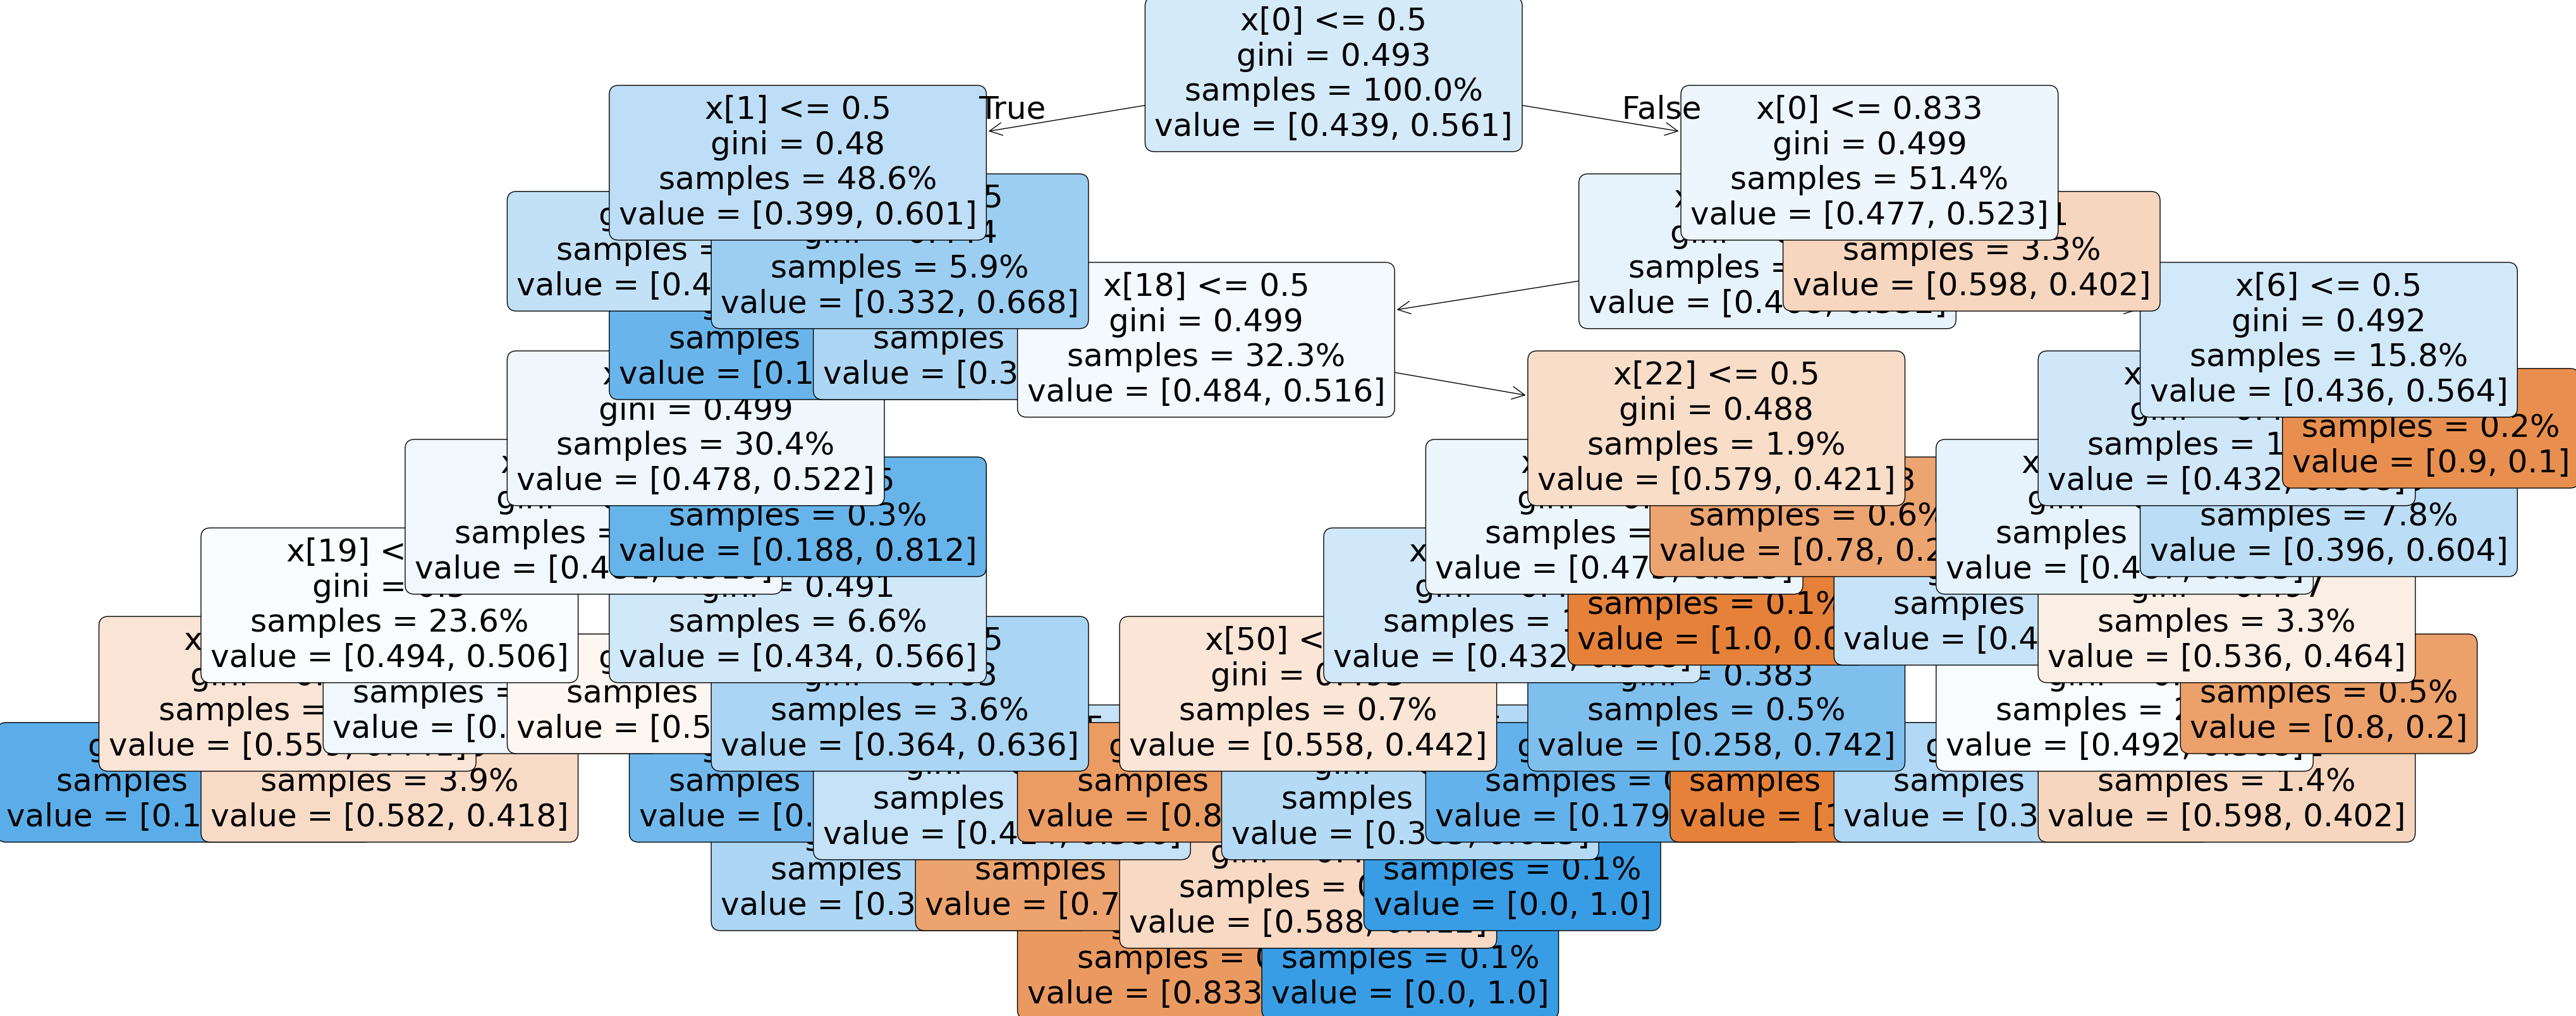

In [39]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True,
    proportion = True,
    fontsize=36,
    rounded = True)
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)

param_grid = {'ccp_alpha': path.ccp_alphas}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 10, verbose=2, n_jobs=-1)
CV_clf.fit(X_train, y_train)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_clf.predict(X_test))))
print(classification_report(y_test, CV_clf.predict(X_test)))

Fitting 10 folds for each of 1034 candidates, totalling 10340 fits
Ein: 0.4397
Eout: 0.4449
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       884
         1.0       0.56      1.00      0.71      1103

    accuracy                           0.56      1987
   macro avg       0.28      0.50      0.36      1987
weighted avg       0.31      0.56      0.40      1987



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X_train, y_train)

    print('Ein: %0.4f' % (1 - accuracy_score(y_train, estimator.predict(X_train))))
    print('Eout: %0.4f' % (1 - accuracy_score(y_test, estimator.predict(X_test))))

    print(classification_report(y_test, estimator.predict(X_test)))
    graph = graphviz.Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))

    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,8)
   , min_samples_leaf=(1,20))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Árvore de decisão para classificação multiclasse
